In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics

## Let's work on a regression problem

In [2]:
data = pd.read_csv('temps.csv')

## Following are explanations of the columns:
### year: 2016 for all data points
### month: number for month of the year
### day: number for day of the year
### week: day of the week as a character string
### temp_2: max temperature 2 days prior
### temp_1: max temperature 1 day prior
### average: historical average max temperature
### actual: max temperature measurement
### friend: your friend’s prediction, a random number between 20 below the average and 20 above the average

In [3]:
data.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [4]:
data.tail()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42
347,2016,12,31,Sat,48,57,45.5,40,42,48,47,57


In [5]:
data.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [6]:
data.describe

<bound method NDFrame.describe of      year  month  day   week  temp_2  temp_1  average  actual  forecast_noaa  \
0    2016      1    1    Fri      45      45     45.6      45             43   
1    2016      1    2    Sat      44      45     45.7      44             41   
2    2016      1    3    Sun      45      44     45.8      41             43   
3    2016      1    4    Mon      44      41     45.9      40             44   
4    2016      1    5   Tues      41      40     46.0      44             46   
5    2016      1    6    Wed      40      44     46.1      51             43   
6    2016      1    7  Thurs      44      51     46.2      45             45   
7    2016      1    8    Fri      51      45     46.3      48             43   
8    2016      1    9    Sat      45      48     46.4      50             46   
9    2016      1   10    Sun      48      50     46.5      52             45   
10   2016      1   11    Mon      50      52     46.7      45             42   
11   2

In [7]:
#data['date'] = data['day'].map(str) + data['month'].map(str) + data['year'].map(str)

In [8]:
data['date'] = pd.to_datetime(data[['day','month','year']])

In [9]:
data.drop(columns=['day','month','year'], axis=1).head()

,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,date
0,Fri,45,45,45.6,45,43,50,44,29,2016-01-01
1,Sat,44,45,45.7,44,41,50,44,61,2016-01-02
2,Sun,45,44,45.8,41,43,46,47,56,2016-01-03
3,Mon,44,41,45.9,40,44,48,46,53,2016-01-04
4,Tues,41,40,46.0,44,46,46,46,41,2016-01-05


In [10]:
data['date'].head()

0   2016-01-01
1   2016-01-02
2   2016-01-03
3   2016-01-04
4   2016-01-05
Name: date, dtype: datetime64[ns]

C:\Users\prave\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\Users\prave\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


<Figure size 432x288 with 0 Axes>

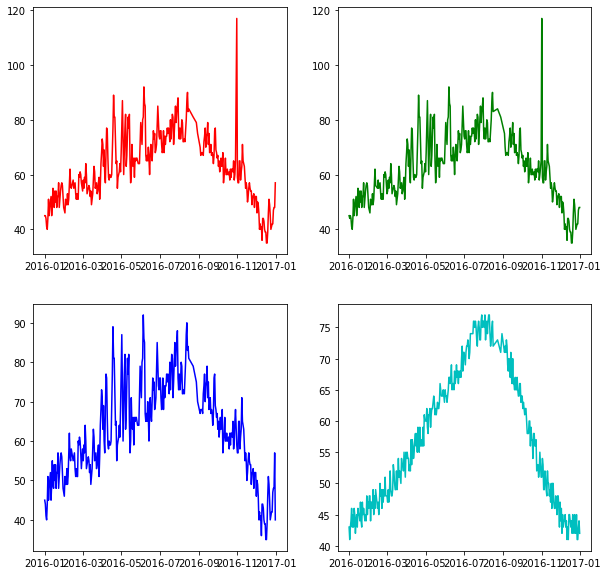

In [11]:
fig = plt.figure()
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].plot(data['date'],data['temp_1'],'r')
ax[0,1].plot(data['date'],data['temp_2'],'g')
ax[1,0].plot(data['date'],data['actual'],'b')
ax[1,1].plot(data['date'],data['forecast_noaa'],'c')

fig.show()

In [12]:
# One-hot encode the data using pandas get_dummies
week = pd.get_dummies(data['week'],drop_first=True)
data.drop(['week','year','month','day','date'],axis=1,inplace=True)

data1 = pd.concat([data,week],axis=1)

In [13]:
data1.head()

,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,Mon,Sat,Sun,Thurs,Tues,Wed
0,45,45,45.6,45,43,50,44,29,0,0,0,0,0,0
1,44,45,45.7,44,41,50,44,61,0,1,0,0,0,0
2,45,44,45.8,41,43,46,47,56,0,0,1,0,0,0
3,44,41,45.9,40,44,48,46,53,1,0,0,0,0,0
4,41,40,46.0,44,46,46,46,41,0,0,0,0,1,0


In [14]:
# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(data1.drop('actual',axis=1), data1['actual'], test_size = 0.2, random_state = 100)

In [15]:
## Let's set baseline using linear model
from sklearn.linear_model import LinearRegression

log_model = LinearRegression()

log_model.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
prediction = log_model.predict(test_X)

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, prediction))

print('Mean Sqaured Error:', metrics.mean_squared_error(test_y, prediction))

print('Root Mean Sqaured Error:', np.sqrt(metrics.mean_squared_error(test_y, prediction)))

print('R2:', metrics.r2_score(test_y, prediction))

Mean Absolute Error: 3.8080080981227913
Mean Sqaured Error: 42.48246631275788
Root Mean Sqaured Error: 6.517857494051084
R2: 0.7223234876791288


### Let's create a random forest model

In [18]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 100, max_features = "sqrt", n_jobs = -1, verbose = 1)
# Train the model on training data
rf.fit(train_X,train_y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.9s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=100, verbose=1,
                      warm_start=False)

In [19]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_X)

print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predictions))

print('Mean Sqaured Error:', metrics.mean_squared_error(test_y, predictions))

print('Root Mean Sqaured Error:', np.sqrt(metrics.mean_squared_error(test_y, predictions)))

print('R2:', metrics.r2_score(test_y, predictions))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished


Mean Absolute Error: 3.241973809523809
Mean Sqaured Error: 17.302544769444445
Root Mean Sqaured Error: 4.159632768579992
R2: 0.8869060414128492


## Let's work on a classification problem

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [3]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=0.2, 
                 random_state=0)

In [4]:
## Let's set baseline using logistic model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(multi_class = "multinomial", 
                               max_iter=1000, solver='saga', 
                               n_jobs=-1, verbose=1)

log_model.fit(train_img,train_lbl)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 2512 seconds


C:\Users\prave\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 41.9min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=1,
                   warm_start=False)

In [5]:
pred_test = log_model.predict(test_img)

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(test_lbl,pred_test))

[[1342    0    7    2    2   12   14    1    5    2]
 [   0 1539    6    6    2    5    2    3   15    2]
 [  11   20 1287   21   18    4   19   14   44    5]
 [   3    5   48 1264    0   48    1   13   36   17]
 [   2    3    6    4 1247    4   19   16    8   41]
 [  16    4   15   43   13 1051   28    5   43   13]
 [  18    6   13    3   14   20 1305    2    6    0]
 [   5    7   22    7   13    3    1 1328   10   62]
 [   4   29   11   32    9   38   15    2 1210   18]
 [   5    5    8   16   47    8    1   42   17 1212]]


In [7]:
print(classification_report(test_lbl,pred_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1387
           1       0.95      0.97      0.96      1580
           2       0.90      0.89      0.90      1443
           3       0.90      0.88      0.89      1435
           4       0.91      0.92      0.92      1350
           5       0.88      0.85      0.87      1231
           6       0.93      0.94      0.93      1387
           7       0.93      0.91      0.92      1458
           8       0.87      0.88      0.88      1368
           9       0.88      0.89      0.89      1361

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



### Let's create a random forest model

In [8]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, 
                            random_state = 100, 
                            max_features = 'sqrt',
                            criterion = "gini", 
                            max_depth = 5, 
                            min_samples_split = 2, 
                            min_samples_leaf = 1, 
                            oob_score = True, 
                            verbose = 1, 
                            n_jobs = -1)
# Train the model on training data
rf.fit(train_img,train_lbl)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.3min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=100, verbose=1,
                       warm_start=False)

In [9]:
rf.oob_score_

0.8648571428571429

In [10]:
pred_test1 = rf.predict(test_img)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.6s finished


In [11]:
print(confusion_matrix(test_lbl,pred_test1))

[[1340    1    4    1    2    1   16    3   19    0]
 [   0 1545    7    6    2    2    4    5    8    1]
 [  12   40 1231   30   21    1   40   30   29    9]
 [   9   42   50 1196    6   17    5   31   43   36]
 [   5    4    5    1 1127    0   31   13   16  148]
 [  28   51    7  165   29  826   33   20   30   42]
 [  30   19   11    0   19   10 1282    7    9    0]
 [   7   43   36    1   25    0    0 1273    9   64]
 [   4   96   17   73   10   12   16    4 1077   59]
 [  11   10   12   23   39    4    7   80   26 1149]]


In [10]:
print(classification_report(test_lbl,pred_test1))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1387
           1       0.83      0.98      0.90      1580
           2       0.89      0.85      0.87      1443
           3       0.80      0.83      0.82      1435
           4       0.88      0.83      0.86      1350
           5       0.95      0.67      0.79      1231
           6       0.89      0.92      0.91      1387
           7       0.87      0.87      0.87      1458
           8       0.85      0.79      0.82      1368
           9       0.76      0.84      0.80      1361

    accuracy                           0.86     14000
   macro avg       0.87      0.86      0.86     14000
weighted avg       0.86      0.86      0.86     14000

